<center>
<h1> Automobile Sales — Exploratory Data Analysis (EDA) With Python </h1>
</center>



# Objective
The goal of this analysis is to understand the structure, quality, and business patterns within the automobile sales dataset.  
This includes examining pricing trends, brand-level behavior, demand indicators, and any factors influencing vehicle value.

## Key Questions
- What drives the price of a vehicle?
- Are there clear patterns or anomalies in the data?
- What actionable insights can be extracted for a business context?


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Dataset Overview

This dataset contains automobile sales/listing information.  
Below is a summary of important structural details:

### Information we want to understand:
- Number of rows and columns  
- Column names and types  
- Initial data quality  
- Any unexpected or inconsistent values  


In [ ]:
Original_Data=pd.read_csv('/content/Auto Sales data.csv')

In [ ]:
df=Original_Data.copy()

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


# Data Quality Check
# Data Cleaning




### How many rows and columns?

In [ ]:
df.shape

(2747, 20)

### Explanation

- There are 2747 Rows and
20 Columns in this dataset.

## Information of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

## Explanation

Dataset consists of
- 13 object Features
- 5 integer Features
- 2 Float   Features

# Datatypes of Features in Dataset

In [ ]:
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
DAYS_SINCE_LASTORDER,int64
STATUS,object
PRODUCTLINE,object
MSRP,int64


# Checking for Missing Values

In [ ]:
df.isna().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


## Explanation
There is no any missing Values in any Feature.

# Checking for Duplicate Values

In [ ]:
df.duplicated().sum()

np.int64(0)

## Explanation
- There is no any Duplicated values or rows.

## Finding number of Categorical Features and count of unique values in each categorical feature.

In [ ]:
categorical_columns=df.select_dtypes(include='object').columns
print(len(categorical_columns))

13


In [ ]:
for col in categorical_columns:
  print(f"/nColumn Name: {col}")
  print(df[col].nunique())

/nColumn Name: ORDERDATE
246
/nColumn Name: STATUS
6
/nColumn Name: PRODUCTLINE
7
/nColumn Name: PRODUCTCODE
109
/nColumn Name: CUSTOMERNAME
89
/nColumn Name: PHONE
88
/nColumn Name: ADDRESSLINE1
89
/nColumn Name: CITY
71
/nColumn Name: POSTALCODE
73
/nColumn Name: COUNTRY
19
/nColumn Name: CONTACTLASTNAME
76
/nColumn Name: CONTACTFIRSTNAME
72
/nColumn Name: DEALSIZE
3


# Insights

There are 13 categorical fields and every categorical fields have unique values.

# Updating Date Fields


In [ ]:
df['ORDERDATE']=df['ORDERDATE'].astype('datetime64[ns]')

In [ ]:
df['ORDERDATE'].head()

,ORDERDATE
0,2018-02-24
1,2018-07-05
2,2018-01-07
3,2018-08-25
4,2018-10-28


## Extracting Year and Month from Date Feild

In [ ]:
df['Year']=df['ORDERDATE'].dt.year

In [ ]:
df['Year'].unique()

array([2018, 2019, 2020], dtype=int32)

In [ ]:
df['Month']=df['ORDERDATE'].dt.month

In [ ]:
df['Discount%']=((df['PRICEEACH']-df['MSRP'])/df['MSRP'])*100

# Handling Outliers in Numerical Fields


In [ ]:
Numerical_columns=df.select_dtypes(include=['number','datetime']).columns
print(len(Numerical_columns))

11


## Checking Outliers Using Boxplot


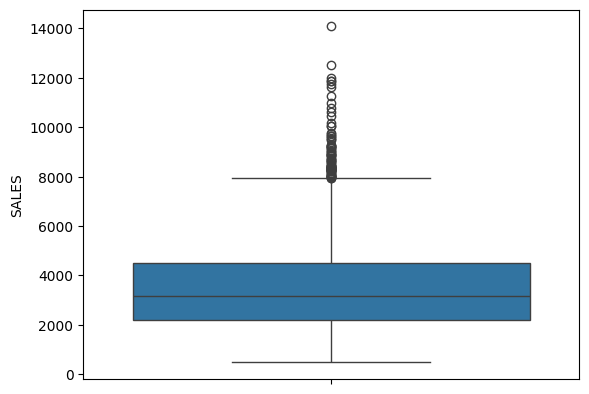

In [ ]:
sns.boxplot(y=df['SALES'])
plt.show()

## Replacing Outliers in all numerical fields

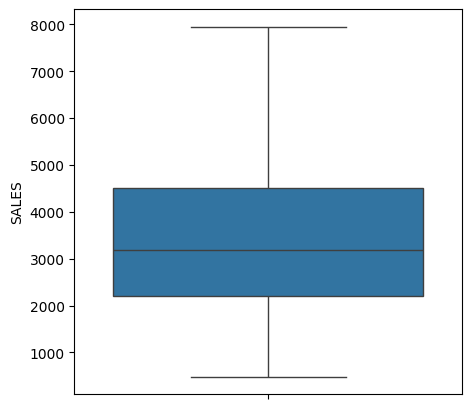

In [ ]:
for col in Numerical_columns:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)
plt.figure(figsize=(5,5))
sns.boxplot(y=df['SALES'])
plt.show()

All the outliers of numerical fields in the dataset has been optimized.

# Data Analysis

## Aggregation on Numerical Fields

## Sales

In [ ]:
df['SALES'].agg(['mean','min','max','std'])

,SALES
mean,3518.549056
min,482.130000
max,7951.212500
std,1729.457164


## MSRP

In [ ]:
df['MSRP'].agg(['mean','min','max','std'])

,MSRP
mean,100.634874
min,33.000000
max,208.000000
std,39.958239


## Price Each

In [ ]:
df['PRICEEACH'].agg(['mean','min','max','std'])

,PRICEEACH
mean,100.863809
min,26.880000
max,214.632500
std,41.332078


## Quantity Ordered

In [ ]:
df['QUANTITYORDERED'].agg(['mean','min','max','std'])

,QUANTITYORDERED
mean,35.069894
min,6.000000
max,67.000000
std,9.623249


# Distribution


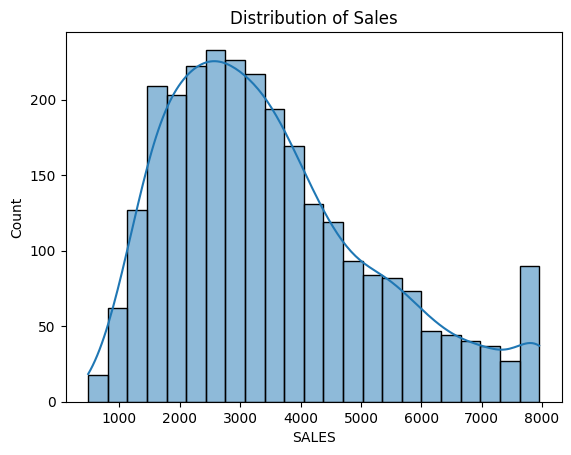

In [ ]:
sns.histplot(df['SALES'],kde=True,bins='auto')
plt.title("Distribution of Sales")
plt.show()

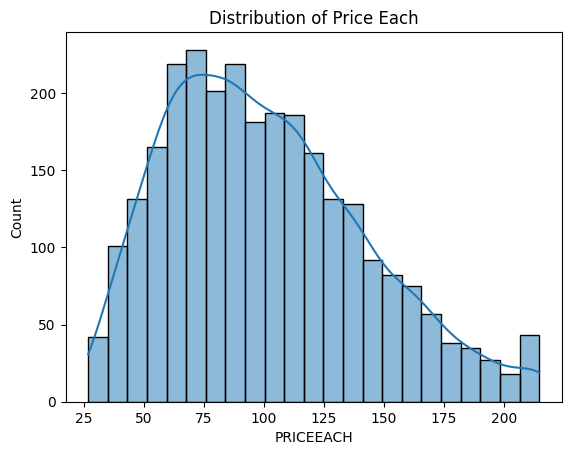

In [ ]:
sns.histplot(df['PRICEEACH'],kde=True,bins='auto')
plt.title("Distribution of Price Each")
plt.show()

# Sales Performance Overview

### Goal:Evaluate how well the company is performing overall.



## What is the total and average sales?


In [ ]:
Total_Sales=df['SALES'].sum().astype('int')
Average_Sales=df['SALES'].mean()
import inflect
p=inflect.engine()
print(Total_Sales)
print(Average_Sales)
Total_Sales_inWords=p.number_to_words(Total_Sales)
Average_Sales_inWords=p.number_to_words(Average_Sales)
print(Total_Sales_inWords)
print(Average_Sales_inWords)

9665454
3518.5490562431746
nine million, six hundred and sixty-five thousand, four hundred and fifty-four
three thousand, five hundred and eighteen point five four nine zero five six two four three one seven four six


# Insights
- **Total Sales** :(9665454) nine million, six hundred and sixty-five thousand, four hundred and fifty-four
- **Average Sales** :(3518.54) three thousand,five hundred and eighteen point fifty four

# Which deal size category (Small, Medium, Large) contributes most to total revenue?

In [ ]:
TotalSales_on_DealSize=df.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)
print(TotalSales_on_DealSize)

DEALSIZE
Medium    5.931231e+06
Small     2.570034e+06
Large     1.164189e+06
Name: SALES, dtype: float64


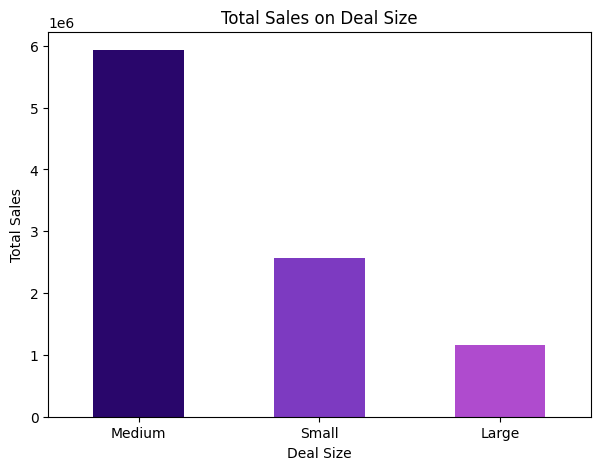

In [ ]:
TotalSales_on_DealSize.astype(int)
plt.figure(figsize=(7,5))
TotalSales_on_DealSize.plot(kind='bar',color=['#29066B','#7D3AC1','#AF4BCE','#DB4CB2','#EB548C'])
plt.title('Total Sales on Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# Insights
- **Medium** size category contributes most to total revenue.


#Which countries generate the highest sales?

In [ ]:
HighestSales_Countries=df.groupby('COUNTRY')['SALES'].sum()
print(len(HighestSales_Countries))
HighestSales_Countries.astype(int).sort_values(ascending=False).head()

19


,SALES
COUNTRY,
USA,3320665
Spain,1203518
France,1094416
Australia,626029
UK,474247


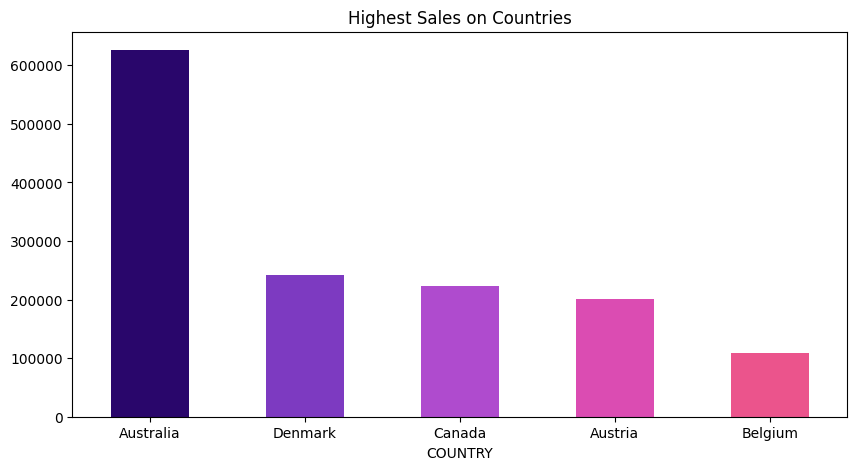

In [ ]:
country=HighestSales_Countries.astype(int).head(5).sort_values(ascending=False)
plt.figure(figsize=(10,5))
country.plot(kind='bar',color=['#29066B','#7D3AC1','#AF4BCE','#DB4CB2','#EB548C'])
plt.title('Highest Sales on Countries')
plt.xticks(rotation=0)
plt.show()

#Insights
- Australia
- Denmark
- Canada
- Austria
- Belgium

These Countries generates the highest sales.


# Which product lines are the top performers by sales volume and count?

PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Name: count, dtype: int64


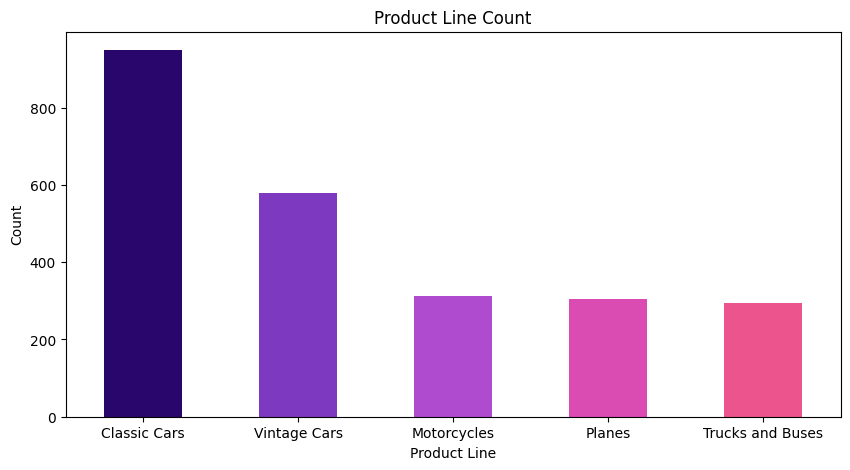

In [ ]:
ProductLine_Count=df['PRODUCTLINE'].value_counts().head(5).sort_values(ascending=False)
print(ProductLine_Count)
plt.figure(figsize=(10,5))
ProductLine_Count.plot(kind='bar',color=['#29066B','#7D3AC1','#AF4BCE','#DB4CB2','#EB548C'])
plt.title('Product Line Count')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Insights
- Classic Cars
- Vintage Cars
- Motorcycles
- Planes
-Trucks and Buses

These Product lines are the top performers by sales volume and count.


#Time-Series Analysis

##Goal: Discover trends and seasonality.

# Identify which month has the highest Sales?

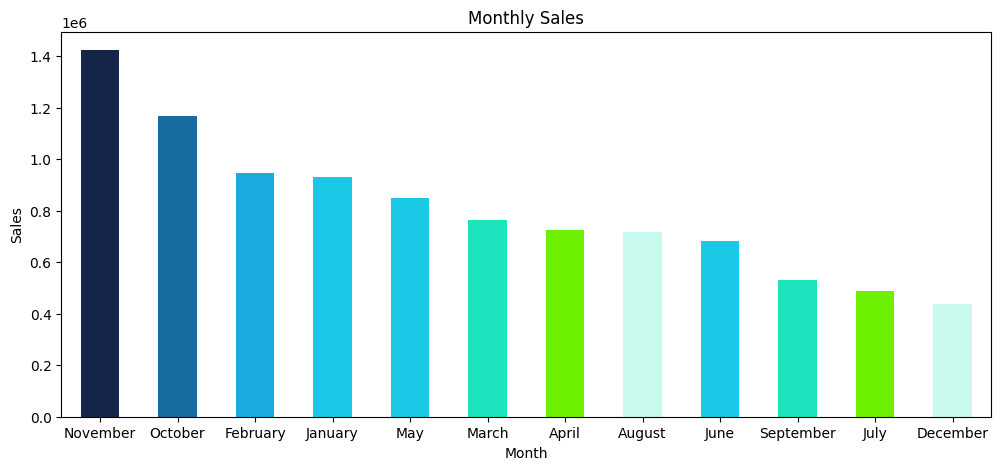

In [ ]:
df['Month']=df['ORDERDATE'].dt.month_name()
MonthlySales=df.groupby('Month')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
MonthlySales.plot(kind='bar',color=['#142549','#176BA0','#19AADE','#1AC9E6','#1AC9E5','#1DE4BD','#6DF002','#C7F9EE','#1AC9E5','#1DE4BD','#6DF002','#C7F9EE'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

# Plot monthly sales trends.

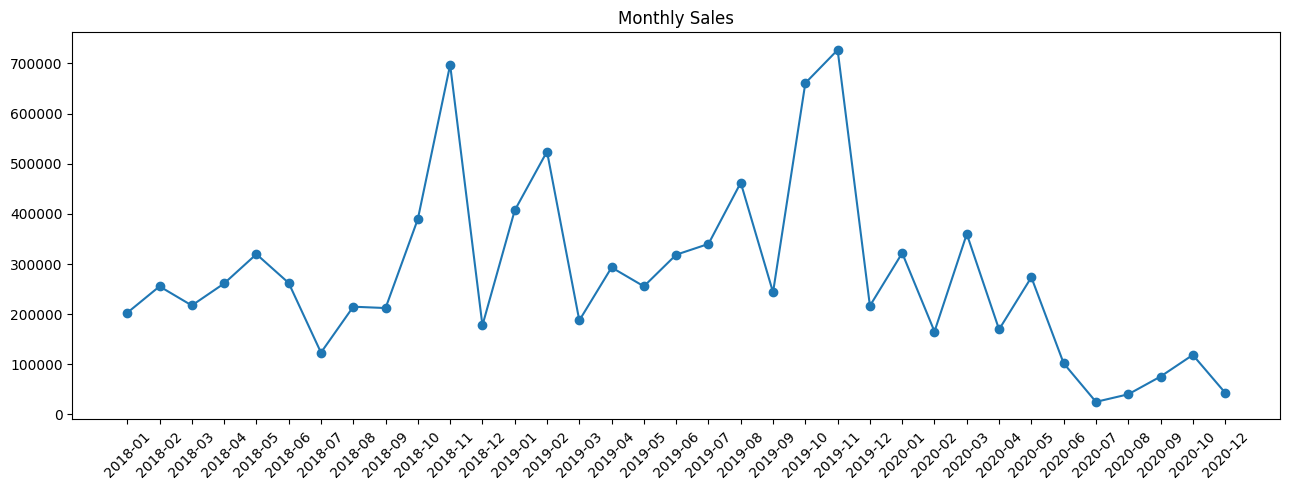

In [ ]:

df['year'] = df['ORDERDATE'].dt.year
df['month'] = df['ORDERDATE'].dt.month
df['year_month'] = df['ORDERDATE'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('year_month')['SALES'].sum().reset_index()
plt.figure(figsize=(13,5))
plt.plot(monthly_sales['year_month'], monthly_sales['SALES'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.tight_layout()
plt.show()


# Identify peak months and low-performing periods

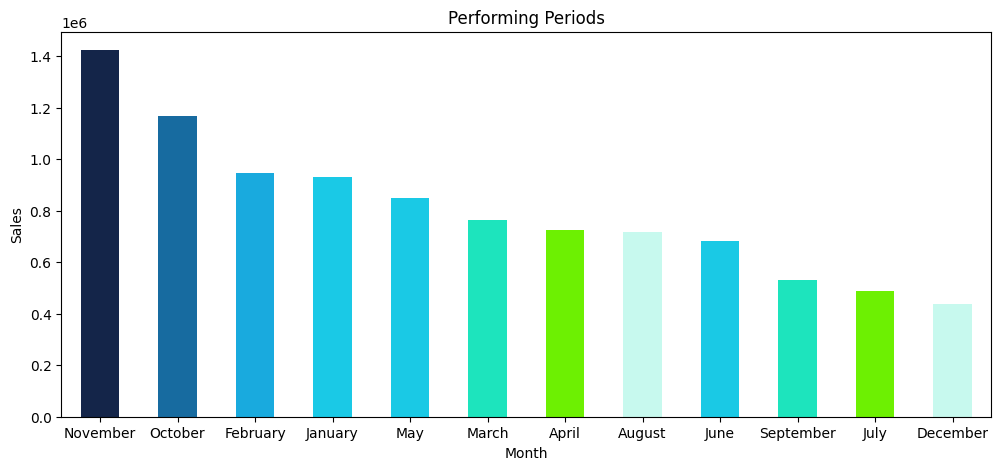

In [ ]:
Performing_Periods=df['Month'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,5))
MonthlySales.plot(kind='bar',color=['#142549','#176BA0','#19AADE','#1AC9E6','#1AC9E5','#1DE4BD','#6DF002','#C7F9EE','#1AC9E5','#1DE4BD','#6DF002','#C7F9EE'])
plt.title('Performing Periods')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()


# Insights
**Peak Months are:**

- November
- October
- February
- January

**Low Performing Periods are:**

- September
- July
- December

In [ ]:
df['DAYS_SINCE_LASTORDER'].describe()

,DAYS_SINCE_LASTORDER
count,2747.000000
mean,1757.085912
std,819.280576
min,42.000000
25%,1077.000000
50%,1761.000000
75%,2436.500000
max,3562.000000


# Analyze order frequency over time (using DAYS_SINCE_LASTORDER)

In [ ]:
df['DAYS_SINCE_LASTORDER'].max()

3562

In [ ]:
df['DAYS_SINCE_LASTORDER'].min()

42

In [ ]:
df['DAYS_SINCE_LASTORDER'].mean()

np.float64(1757.085911903895)

In [ ]:
df['DAYS_SINCE_LASTORDER'].quantile(0.25)

np.float64(1077.0)

In [ ]:
df['DAYS_SINCE_LASTORDER'].quantile(0.75)

np.float64(2436.5)

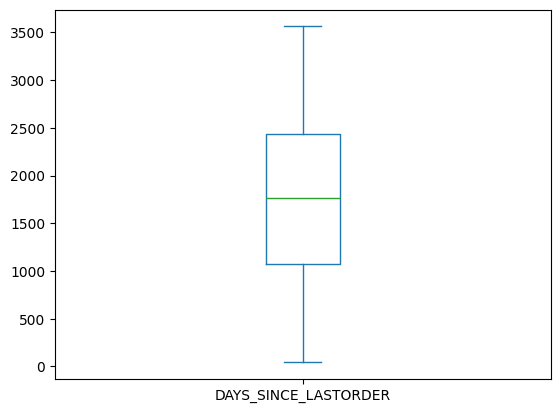

In [ ]:
df['DAYS_SINCE_LASTORDER'].plot(kind='box')
plt.show()

# Insights
- **3562 Days** is the maximum frequency of order over time.
- **42 Days** is the minimum frequency of order over time.
- **1757 Days** is the average frequency of order over time.




# Product Insights

In [ ]:
df['PRODUCTCODE'].head()

,PRODUCTCODE
0,S10_1678
1,S10_1678
2,S10_1678
3,S10_1678
4,S10_1678


# Which products (PRODUCTCODE) have the highest total sales?

PRODUCTCODE
S18_3232    276897.1300
S10_1949    165588.2875
S12_1108    157921.0875
S18_2238    152908.7350
S10_4698    147772.7775
Name: SALES, dtype: float64


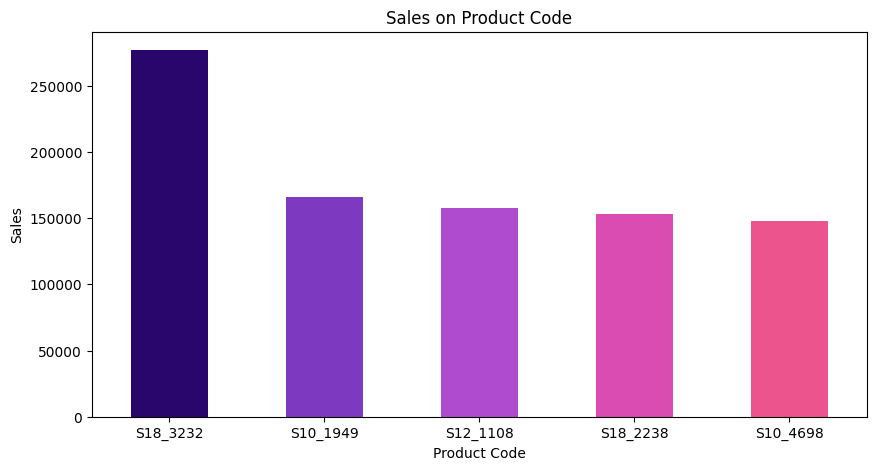

In [ ]:
Sales_on_ProductCode=df.groupby('PRODUCTCODE')['SALES'].sum()
Sales_on_ProductCode.sort_values(ascending=False).head(5)
HighestSales_ProductCode=Sales_on_ProductCode.sort_values(ascending=False).head(5)
print(HighestSales_ProductCode)
plt.figure(figsize=(10,5))
HighestSales_ProductCode.plot(kind='bar',color=['#29066B','#7D3AC1','#AF4BCE','#DB4CB2','#EB548C'])
plt.title('Sales on Product Code')
plt.xlabel('Product Code')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

# Insights
- **S18_3232**  Total Sales=276897.1300
- **S10_1949**  Total Sales=165588.2875
- **S12_1108** Total Sales=157921.0875
- **S18_2238** Total Sales=152908.7350
- **S10_4698** Total Sales=147772.7775

These are top 5 Products with the highest sales value.

# What is the most ordered quantity per product line?

PRODUCTLINE
Classic Cars        33322
Vintage Cars        20050
Motorcycles         11080
Planes              10608
Trucks and Buses    10576
Ships                7989
Trains               2712
Name: QUANTITYORDERED, dtype: int64


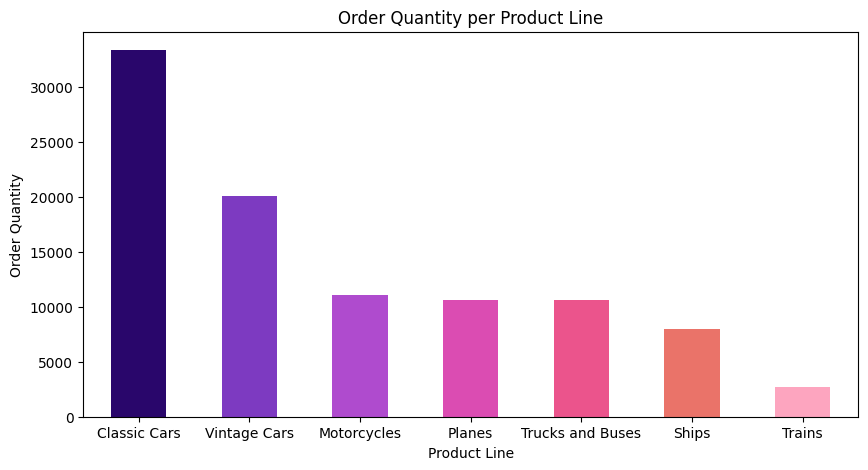

In [ ]:
Order_Quantity_per_ProductLine=df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()
Quantity=Order_Quantity_per_ProductLine.sort_values(ascending=False)
print(Quantity)
plt.figure(figsize=(10,5))
Quantity.plot(kind='bar',color=['#29066B','#7D3AC1','#AF4BCE','#DB4CB2','#EB548C','#EA7369','#FDA5BF'])
plt.title('Order Quantity per Product Line')
plt.xlabel('Product Line')
plt.ylabel('Order Quantity')
plt.xticks(rotation=0)
plt.show()

# Insights
### PRODUCTLINE
- Classic Cars     with   33322 orders


- Vintage Cars      with  20050 orders
- Vintage Cars     with   20050 orders
- Motorcycles    with     11080 orders
- Planes         with     10608 orders
- Trucks and Buses with   10576 orders
- Ships           with     7989 orders
- Trains          with     2712 orders



**Classic Cars** is the most ordered quantity per product line with **3332** orders.

In [ ]:
df['Profit']=df['MSRP']-df['PRICEEACH']

In [ ]:
Revenue=df.groupby('PRODUCTLINE')['SALES'].sum().astype(int).sort_values(ascending=False)
Profit=df.groupby('PRODUCTLINE')['Profit'].sum().sort_values(ascending=False)
sales_margin=Profit/Revenue*100
print(sales_margin)
#print(Revenue)
#print(Profit)

PRODUCTLINE
Classic Cars        0.120951
Motorcycles        -0.084113
Planes             -0.046467
Ships              -0.072700
Trains             -0.380242
Trucks and Buses   -0.049549
Vintage Cars       -0.108075
dtype: float64


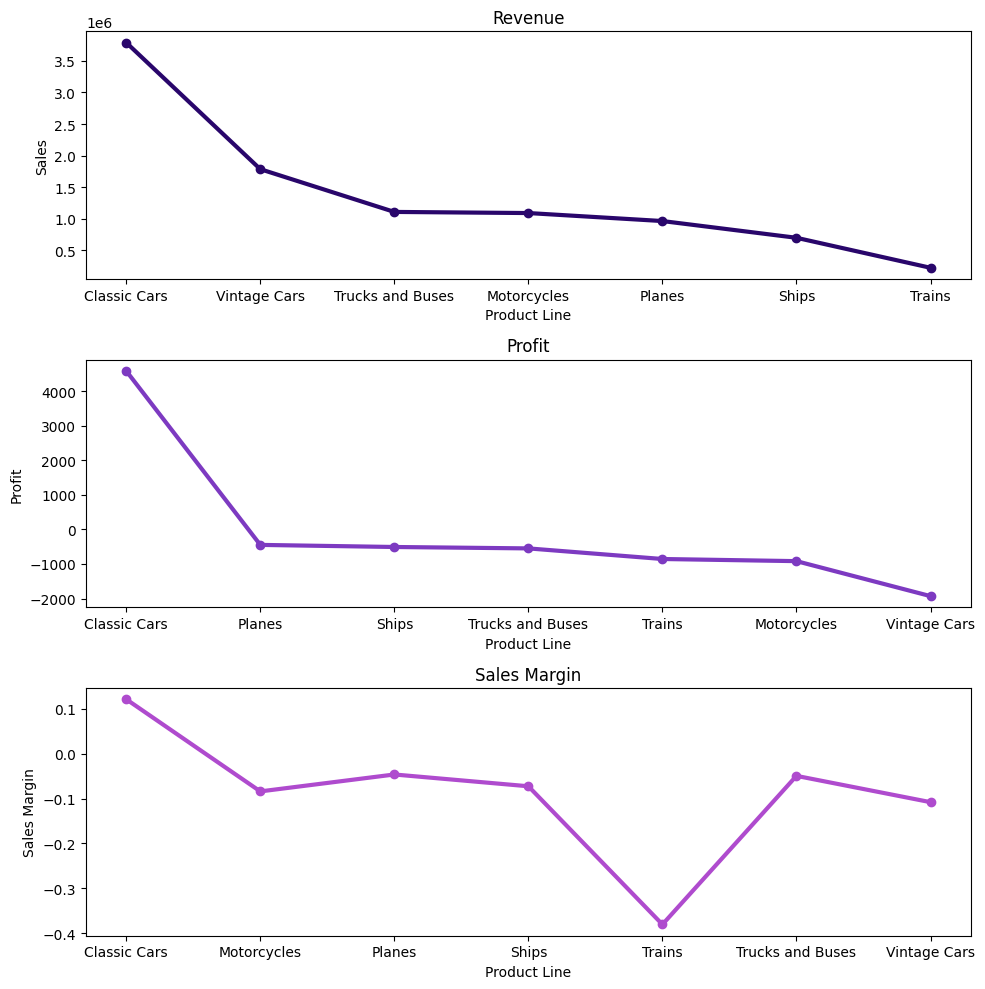

In [ ]:
from matplotlib.typing import MarkerType
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
Revenue.plot(kind='line',color='#29066B',linewidth=3,marker='o')
plt.title('Revenue')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.subplot(3,1,2)
Profit.plot(kind='line',color='#7D3AC1',linewidth=3,marker='o')
plt.title('Profit')
plt.xlabel('Product Line')
plt.ylabel('Profit')
plt.subplot(3,1,3)
sales_margin.plot(kind='line',color='#AF4BCE',linewidth=3, marker='o')
plt.title('Sales Margin')
plt.xlabel('Product Line')
plt.ylabel('Sales Margin')
plt.tight_layout()
plt.show()

# Insights
**Classic Cars** brings the most revenue and profit margin.

# Customer Behaviour

In [ ]:
df['CUSTOMERNAME'].head()

,CUSTOMERNAME
0,Land of Toys Inc.
1,Reims Collectables
2,Lyon Souveniers
3,Toys4GrownUps.com
4,Technics Stores Inc.


# Who are the top 5 customers by total SALES?

CUSTOMERNAME
Euro Shopping Channel           902136.0250
Mini Gifts Distributors Ltd.    647207.1575
Australian Collectors, Co.      197858.9450
Muscle Machine Inc              194221.4050
La Rochelle Gifts               178036.5125
Name: SALES, dtype: float64


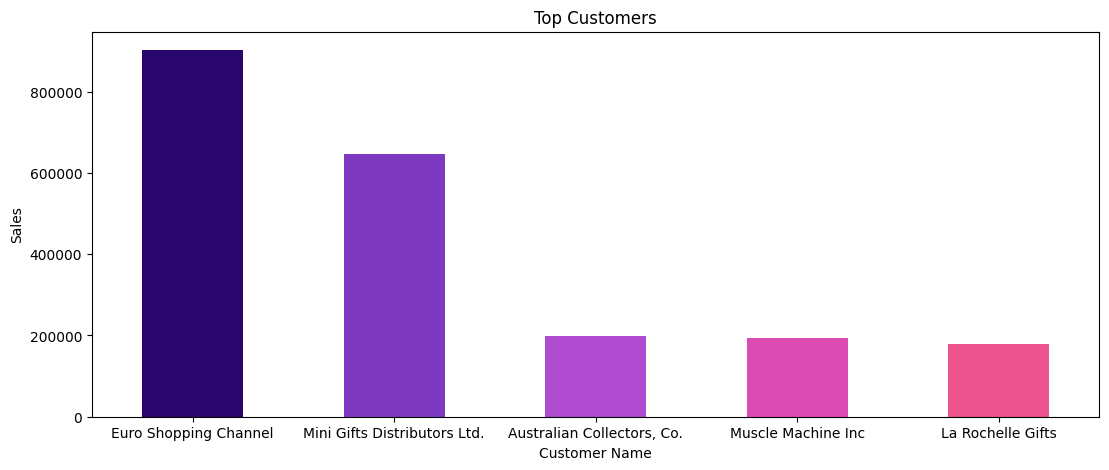

In [ ]:
Top_Customers=df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(5)
print(Top_Customers)
plt.figure(figsize=(13,5))
Top_Customers.plot(kind='bar',color=['#29066B','#7D3AC1','#AF4BCE','#DB4CB2','#EB548C','#EA7369','#FDA5BF'])
plt.title('Top Customers')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

# Which countries or cities have the most frequent customers?

In [ ]:
Frequent_Customers_by_Country=df.groupby(['COUNTRY','CUSTOMERNAME'])['SALES'].count().sort_values(ascending=False).head(3)
print(Frequent_Customers_by_Country)

COUNTRY    CUSTOMERNAME                
Spain      Euro Shopping Channel           259
USA        Mini Gifts Distributors Ltd.    180
Australia  Australian Collectors, Co.       55
Name: SALES, dtype: int64


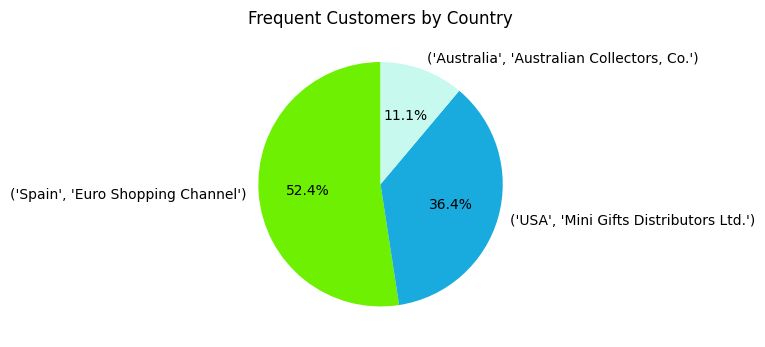

In [ ]:
color=['#6DF002','#19AADE','#C7F9EE']
plt.pie(Frequent_Customers_by_Country,labels=Frequent_Customers_by_Country.index,autopct='%1.1f%%',startangle=90,colors=color)
plt.title('Frequent Customers by Country')
plt.tight_layout()
plt.show()

# Insights

 **Spain** has the most of the customers.

# What is the average order value per customer?


In [ ]:
AverageSales_by_Customer=df.groupby('CUSTOMERNAME')['SALES'].mean().sort_values(ascending=False).head(5)
print(AverageSales_by_Customer)

CUSTOMERNAME
Super Scale Inc.             4619.740147
Royale Belge                 4180.012500
La Corne D'abondance, Co.    4145.124565
Muscle Machine Inc           4046.279271
Gift Depot Inc.              4019.877500
Name: SALES, dtype: float64


# Insights
## Average order value of Top 5 Customers
- **Super Scale Inc.**            
4619.74
- **Royale Belge**     
4180.01
- **La Corne D'abondance, Co.**    
4145.12
- **Muscle Machine Inc**           
4046.27
- **Gift Depot Inc.**            
  4019.87

# Does deal size affect how much customers spend?

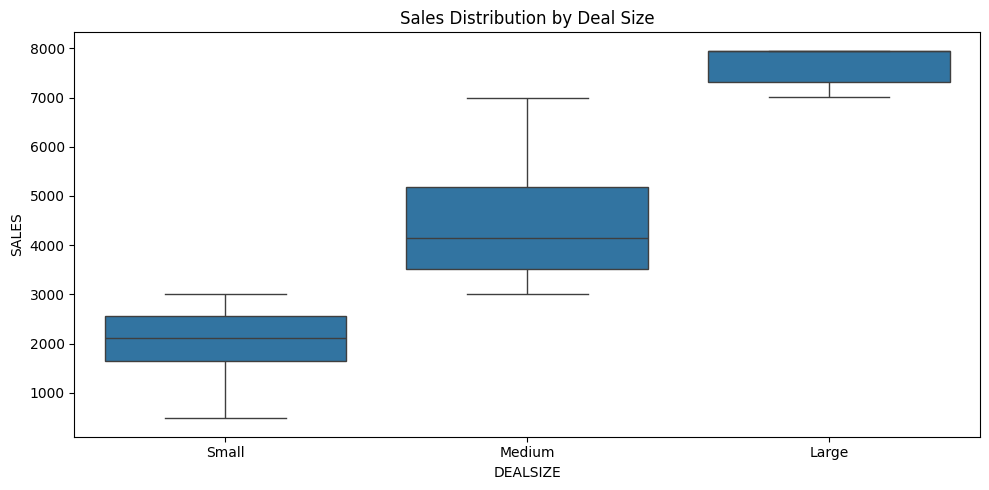

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='DEALSIZE', y='SALES')
plt.title('Sales Distribution by Deal Size')
plt.tight_layout()
plt.show()

# Insights

Yes, **Large** deal size has more impact on customers spend.

# Order & Shipping Analysis

# Which statuses are most common per country or deal size?

In [ ]:
Status_by_DealSize=df.groupby(['DEALSIZE'])['STATUS'].value_counts()
print(Status_by_DealSize)

DEALSIZE  STATUS    
Large     Shipped        138
          Disputed         5
          On Hold          5
          In Process       3
          Resolved         1
Medium    Shipped       1243
          Cancelled       33
          Resolved        26
          On Hold         24
          In Process      18
          Disputed         5
Small     Shipped       1160
          Cancelled       27
          In Process      20
          Resolved        20
          On Hold         15
          Disputed         4
Name: count, dtype: int64


# Insights

**Shipped** is the most common status per deal size.


# Correlation & Relationships

Goal: Find relationships between numeric features.

# Check correlations between SALES, QUANTITYORDERED, PRICEEACH, and MSRP.


In [ ]:
Status_by_Country=pd.crosstab(df['COUNTRY'],df['STATUS']).sort_values(by='Shipped',ascending=False).head()
display(Status_by_Country)

STATUS,Cancelled,Disputed,In Process,On Hold,Resolved,Shipped
COUNTRY,,,,,,
USA,14,0,4,38,13,859
France,0,0,13,0,0,301
Spain,16,6,6,0,18,296
Australia,0,5,13,0,0,167
UK,14,0,0,0,0,130


# Create scatter plots to visualize key relationships.


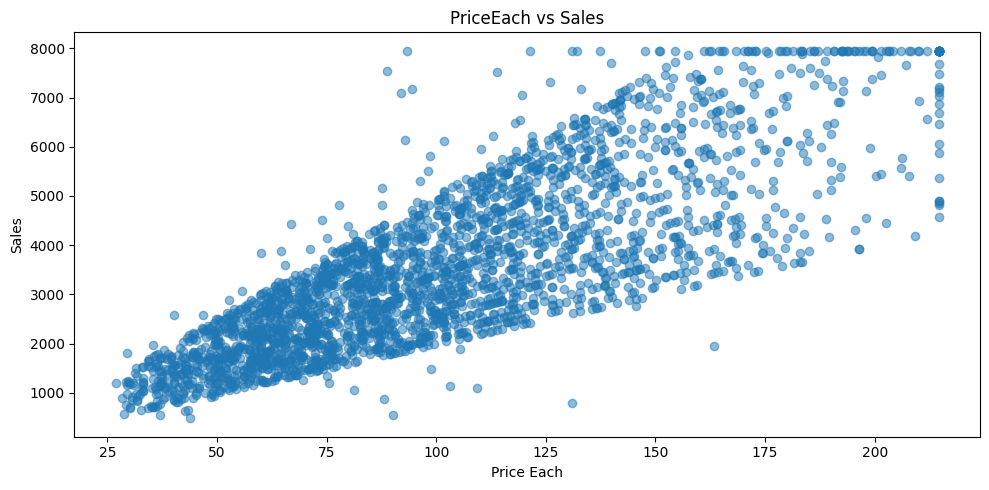

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df['PRICEEACH'], df['SALES'], alpha=0.5)
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.title('PriceEach vs Sales')
plt.tight_layout()
plt.show()
